In [33]:
import numpy as np
import pyintersection as pyi
import matplotlib.pyplot as plt

import plain
import sphere
import manifold_generator as mg
import plotting

In [58]:
plain_norm = np.array([1, 1, 1]) # Norm vector of the plane
plain_par = np.array([1, -0.5, -0.5]) # Some orthogonal to norm vector
plain_offset = np.array([0, 1, -1]) # One another orthogonal to previous other vectors

plain_point_generator = plain.create_point_generator(plain_par, plain_offset)
plain_manifold_generator = mg.create_manifold_generator(plain_point_generator, points_count=300)
plain_mesh = plain.create_mesh(plain_norm)

sphere_point_generator = sphere.create_point_generator()
sphere_manifold_generator = mg.create_manifold_generator(sphere_point_generator, points_count=300)
sphere_mesh = sphere.create_mesh()

In [59]:
mplain = plain_manifold_generator(0, 0, 8)
msphere = sphere_manifold_generator(0, 0, 3)

In [60]:
def _get_manifold_number(rpoint):
    return rpoint[1]

def _get_rpoint_params(rpoint):
    return rpoint[2], rpoint[3]

def _get_cid(rpoint):
    return rpoint[0]

def _generate_new_points(rpoints, atol=None, agen=None, bgen=None):
    usedcids = set()
    ares, bres = [], []
    for rpoint in rpoints:
        n, t = _get_rpoint_params(rpoint)
        manifold = _get_manifold_number(rpoint)
        ####
        cid = _get_cid(rpoint)
        if (cid, manifold) in usedcids:
            continue
        usedcids.add((cid, manifold))
        ####
        if manifold == 0:
            new_points = agen(n, t, atol)
            ares.append(new_points)
        elif manifold == 1:
            new_points = bgen(n, t, atol)
            bres.append(new_points)
        else:
            raise Exception("Wrong manifold number")
          
    counter = 0
    for nparr in ares:
        for unarr in nparr:
            counter += 1
    ares = np.reshape(np.array(ares), (counter, 5))
            
    counter = 0
    for nparr in bres:
        for unarr in nparr:
            counter += 1
    bres = np.reshape(np.array(bres), (counter, 5))
        
    return ares, bres

def _optimize3d(a, b, target_atol=None, agen=None, bgen=None, max_iter=8):
    atol = max(pyi.get_boundary_cube3d(a, b))
    for i in range(max_iter):
        rcubes, rpoints, atols = pyi.intersect3d(a, b, atol=atol/2)
        #print(f'Iteration {i}: target_atols={atol/2} real_atols={max(atols)} rpoins={len(rpoints)} cubes={len(rcubes)}')
        if max(atols) <= target_atol:
            break
        atol = max(atols)
        a, b = _generate_new_points(rpoints, atol=atol, agen=agen, bgen=bgen)
    return rcubes, rpoints, atols

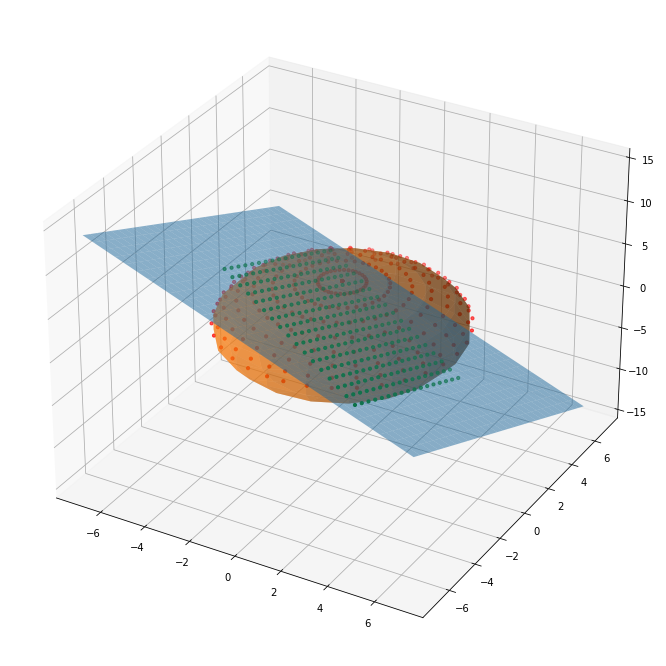

In [61]:
fig = plt.figure(figsize=(12, 12))
axis = fig.add_subplot(111, projection='3d')
plotting.plot_mpoints(axis, mplain, c='g', s=10)
plotting.plot_mpoints(axis, msphere, c='r', s=10)
plotting.plot_surface(axis, plain_mesh, alpha=0.5)
plotting.plot_surface(axis, sphere_mesh, alpha=0.5)

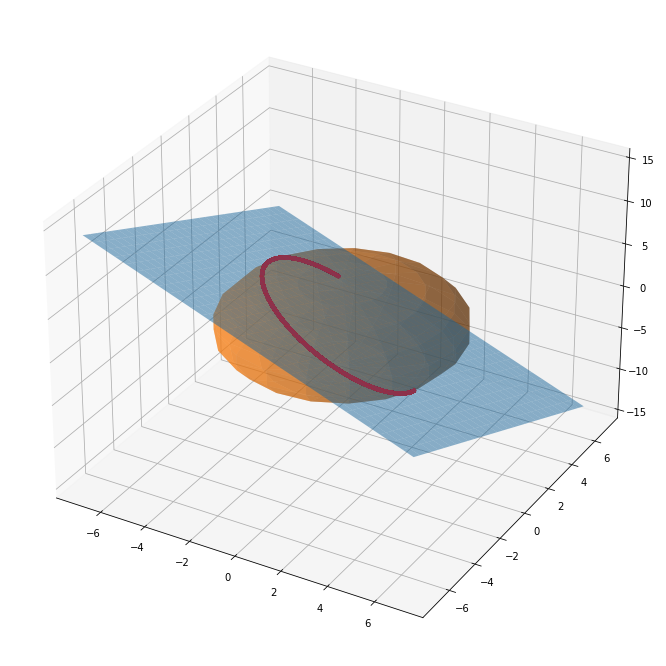

In [74]:
_, rpoints, _ = _optimize3d(mplain, msphere, 0.01,
    plain_manifold_generator, sphere_manifold_generator, max_iter=5)

fig = plt.figure(figsize=(12, 12))
axis = fig.add_subplot(111, projection='3d')
plotting.plot_surface(axis, plain_mesh, alpha=0.5)
plotting.plot_surface(axis, sphere_mesh, alpha=0.5)
plotting.plot_rpoints(axis, rpoints, c='r', s=8)

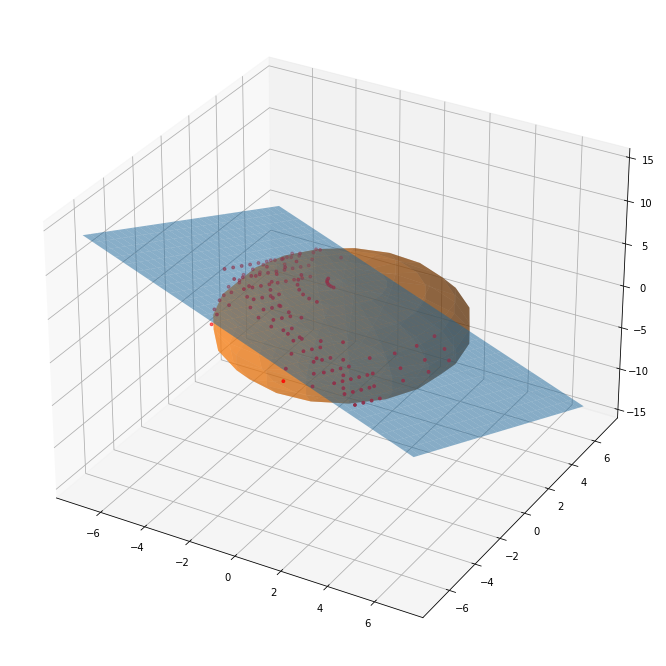

In [56]:
_, rpoints, _ = pyi.optimize3d(mplain, msphere, 0.01,
    plain_manifold_generator, sphere_manifold_generator, max_iter=1)

fig = plt.figure(figsize=(12, 12))
axis = fig.add_subplot(111, projection='3d')
plotting.plot_surface(axis, plain_mesh, alpha=0.5)
plotting.plot_surface(axis, sphere_mesh, alpha=0.5)
plotting.plot_rpoints(axis, rpoints, c='r', s=8)

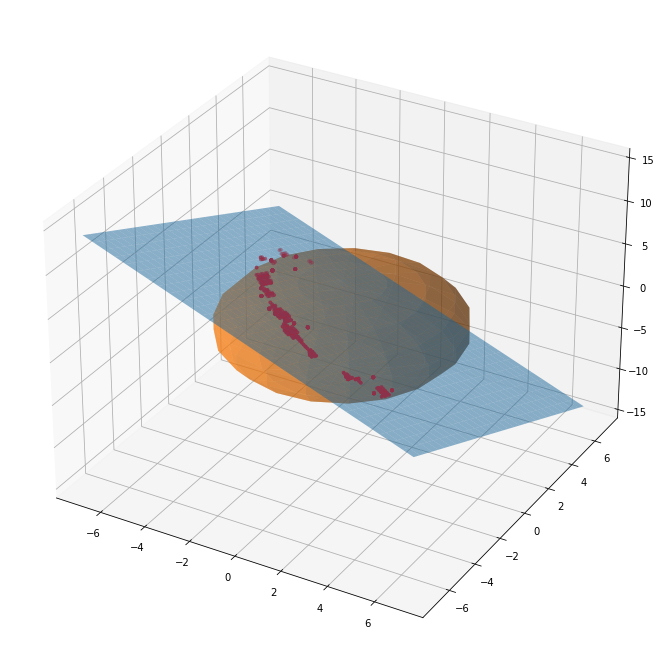

In [40]:
_, rpoints, _ = pyi.optimize3d(mplain, msphere, 0.01,
    plain_manifold_generator, sphere_manifold_generator, max_iter=2)

fig = plt.figure(figsize=(12, 12))
axis = fig.add_subplot(111, projection='3d')
plotting.plot_surface(axis, plain_mesh, alpha=0.5)
plotting.plot_surface(axis, sphere_mesh, alpha=0.5)
plotting.plot_rpoints(axis, rpoints, c='r', s=8)

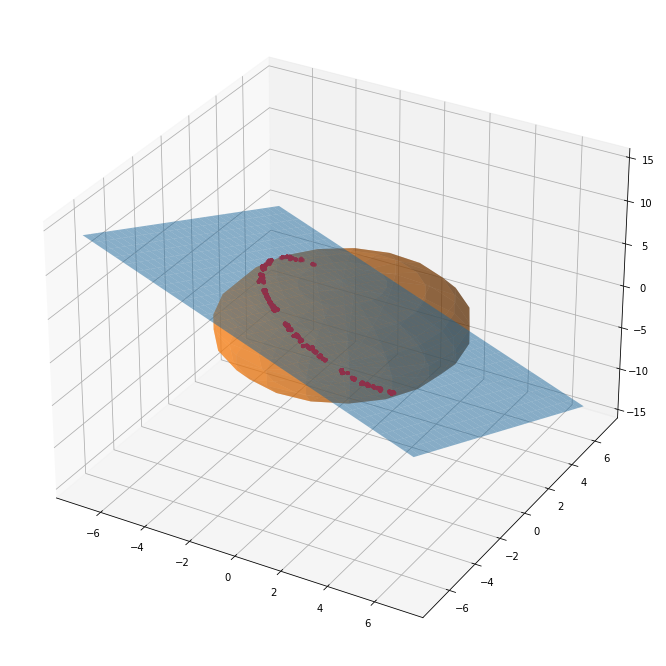

In [41]:
_, rpoints, _ = pyi.optimize3d(mplain, msphere, 0.01,
    plain_manifold_generator, sphere_manifold_generator, max_iter=3)

fig = plt.figure(figsize=(12, 12))
axis = fig.add_subplot(111, projection='3d')
plotting.plot_surface(axis, plain_mesh, alpha=0.5)
plotting.plot_surface(axis, sphere_mesh, alpha=0.5)
plotting.plot_rpoints(axis, rpoints, c='r', s=8)

In [71]:
_, rpoints, _ = pyi.optimize3d(mplain, msphere, 0.01,
    plain_manifold_generator, sphere_manifold_generator, max_iter=1)

# fig = plt.figure(figsize=(12, 12))
# axis = fig.add_subplot(111, projection='3d')
# plotting.plot_surface(axis, plain_mesh, alpha=0.5)
# plotting.plot_surface(axis, sphere_mesh, alpha=0.5)
# plotting.plot_rpoints(axis, rpoints, c='r', s=8)